In [29]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 5)

In [30]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 12, # fontsize for x and y labels (was 10)
              'axes.titlesize': 12,
              'text.fontsize': 12, # was 10
              'legend.fontsize': 12, # was 10
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax


In [31]:
config = {
    "inputData": "/home/jvdzwaan/data/dilipad/CAP/vragenuurtje/*",
    "outDir": "/home/jvdzwaan/data/dilipad/results/all_years-adj-cabinets_selected-parties/{}",
    "nTopics": 100
}

usefulness_data = pd.read_csv(config.get('outDir').format('topics_100_data.csv'), index_col=0, encoding='utf-8')
#usefulness_data

In [32]:
topic2cap = dict(usefulness_data['cap_svm'])
print topic2cap

{0: 19, 1: 3, 2: 19, 3: 16, 4: 10, 5: 3, 6: 10, 7: 3, 8: 15, 9: 15, 10: 19, 11: 15, 12: 6, 13: 15, 14: 16, 15: 20, 16: 12, 17: 12, 18: 19, 19: 17, 20: 14, 21: 3, 22: 5, 23: 3, 24: 12, 25: 5, 26: 4, 27: 20, 28: 19, 29: 15, 30: 6, 31: 19, 32: 2, 33: 2, 34: 13, 35: 19, 36: 15, 37: 4, 38: 1, 39: 14, 40: 2, 41: 13, 42: 15, 43: 19, 44: 1, 45: 2, 46: 7, 47: 15, 48: 1, 49: 6, 50: 19, 51: 19, 52: 15, 53: 14, 54: 13, 55: 12, 56: 4, 57: 2, 58: 3, 59: 5, 60: 20, 61: 17, 62: 2, 63: 2, 64: 20, 65: 19, 66: 6, 67: 8, 68: 8, 69: 16, 70: 19, 71: 13, 72: 19, 73: 20, 74: 12, 75: 13, 76: 12, 77: 15, 78: 8, 79: 16, 80: 6, 81: 3, 82: 2, 83: 3, 84: 10, 85: 7, 86: 20, 87: 10, 88: 19, 89: 21, 90: 12, 91: 17, 92: 12, 93: 20, 94: 3, 95: 12, 96: 6, 97: 1, 98: 2, 99: 13}


In [33]:
# Are all CAP categories present in the topics?
from collections import Counter

c = Counter()
d = {}
for topic, cap in topic2cap.iteritems():
    c[cap] += 1
    if not cap in d.keys():
        d[cap] = []
    d[cap].append(topic)
print c.keys()

topic_cap_mapping = pd.concat([pd.Series(d), pd.Series(c)], axis=1)
topic_cap_mapping.columns = ['topics numbers', 'number of topics']

topic_cap_mapping

[1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21]


,topics numbers,number of topics
1,"[38, 44, 48, 97]",4
2,"[32, 33, 40, 45, 57, 62, 63, 82, 98]",9
3,"[1, 5, 7, 21, 23, 58, 81, 83, 94]",9
4,"[26, 37, 56]",3
5,"[22, 25, 59]",3
6,"[12, 30, 49, 66, 80, 96]",6
7,"[46, 85]",2
8,"[67, 68, 78]",3
10,"[4, 6, 84, 87]",4
12,"[16, 17, 24, 55, 74, 76, 90, 92, 95]",9


In [34]:
# automatically selected high quality topics
print usefulness_data['NPMI'].mean()
c = Counter()
hq = {}
for i, h in enumerate(usefulness_data['NPMI'] > usefulness_data['NPMI'].mean()):
    if h:
        cap = topic2cap[i]
        c[cap] += 1
        if not cap in hq.keys():
            hq[cap] = []
        hq[cap].append(i)
print hq.keys()

#hq[1] = []
#c[1] = 0

#hq[7] = []
#c[7] = 0

#hq[21] = []
#c[21] = 0

topic_cap_mapping['npmi high quality topics'] = pd.Series(hq)
topic_cap_mapping['number of high quality topics'] = pd.Series(c)
print '# high quality tooics (NPMI)', sum(c.values())
topic_cap_mapping = topic_cap_mapping.fillna(0)
topic_cap_mapping[['number of topics', 'number of high quality topics']]

-0.1686586
[2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 15, 16, 17, 19, 20]
# high quality tooics (NPMI) 48


,number of topics,number of high quality topics
1,4,0
2,9,6
3,9,2
4,3,2
5,3,1
6,6,3
7,2,1
8,3,0
10,4,3
12,9,5


['#2b8cbe', '#a6bddb']


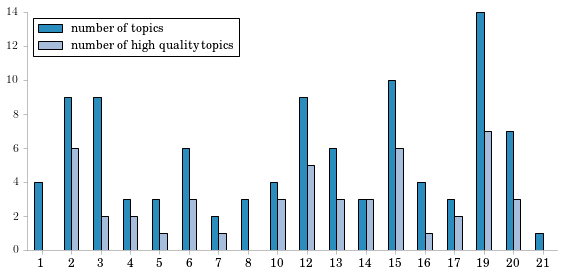

In [35]:
from math import sqrt

SPINE_COLOR = 'gray'

# colors from colorbrewer 3 class pubu
colors = ['#2b8cbe', '#a6bddb']
print colors

latexify(8,4)
plt.figure(1)
topic_cap_mapping[['number of topics', 'number of high quality topics']].plot(kind='bar', colors=colors)
axes = plt.gca()
format_axes(axes)
for tick in axes.get_xticklabels():
    tick.set_rotation(0)
#axes.set_ylim([0,8])
#axes.set_yticklabels(['']+list(df.name))
#axes.set_xlim([0,5500])
#axes.set_xticks(range(0, 5500, 365*2))
#axes.set_xticklabels([str(x) for x in range(1998, 2014, 2)])
plt.tight_layout()
plt.savefig("/home/jvdzwaan/Dropbox/Publications/Papers/Dilipad/latex/images/cap_vragenuurtje_parties_time.pdf")